ДЗ№1

Формулировка задачи, формулировка признакового описания объектов, формулировка функции ошибки, формулировка меры качества модели;

Итак, начнем! (Далее всё будет более менее своими словами)
Задача состоит в том, чтобы построить линейную функцию $f(x)$ многих перменных, которая как можно лучше соответствует имеющимся данным ($X_{tr}$, $y_{tr}$). Вид функции таков: $f(x) = w_0 \cdot 1 + w_1 \cdot x_1 + ... + w_n \cdot x_n$.
В данном случае (уже проверил) n = 4. 
Еще точнее, задача заключается в поиске коэффициентов $w_0, w_1,...,w_n$. 

Признак $x$ объекта $y$ - это результат измерения некторой характеристики объекта. Как я понимаю, в "наглядных" случаях это мог бы быть рост, вес, уровень дохода, форма носа и тд... В данном случае признаком объекта $y$ выступает собственно его $x_i$-ые.

Для того, чтобы понять, насколько сильно предсказываемое значение отличается от истинного, нужен некий параметр. Его роль выполняет функция ошибки. Она должна принимать на вход собственно $y_{предсказываемое}$ и $y_{истинное}$, а на выходе выдавать некоторое число, которое будет характеризовать степень "схожести" между этой парочкой.
Функция ошибки может быть выбрана по-разному. В данном случае я использовал функцию MSE: $L(y, \hat{y}) = \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2$. 

Мера качества

Полагаю, что мерой качества будет выступать отношение $k$ значения функции ошибки на тестовой выборке к значению функции ошибки на валидационной. Если $k << 1$, то недообучена, если $k >> 1$ , то переобучена

исследование исходных данных на предмет скоррелированности признаков; фильтрация признаков; порождение признаков(при необходимости);
НЕ ЗНАЮ

Оценка параметров модели линейной регрессии (обучение модели) методом градиентного спуска;

Основная идея в пошаговом приближении к минимуму функции ошибок.
Функция ошибок - $L(y, \hat{y}) =\frac{1}{N} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2$.
Производная функции ошибок по параметру $w_i: \frac{\partial L}{\partial w_i} = - \frac{1}{N} \cdot 2\cdot \sum\limits_{i=1}^n (y_i - \hat{y}_i) \cdot x_i$ (Если $w_i = w_0$, то вместо $x_i$ стоит $1$). В случае минимума $\frac{\partial L}{\partial w_i} = 0$ и в принципе систему можно было бы решить аналитически, но всплывет обратная матрица, алгоритм вычисления которой равне $O(n^3)$, так что при больших размерах матрицы время работы программы сильно растет.

Вместо этого предлагается следующий подход. Задаются начальные значения весов ${w_i}$. Затем применяется формула
$w_i,n+1 = w_i,n - \lambda \cdot \frac{\partial L}{\partial w_i}$, где $\lambda$ - шаг сходимости (подбирается человеком). Сама формула достаточно естественная, т.к. градиент указывает направление наискорейшего роста функции, так что беря его с обратным знаком, движение будет к минимуму. В векторном виде формула примет вид:
$\bf{w}_{n+1}= \bf{w}_n - \bf{\lambda} \cdot grad(L)$, где $\bf{\lambda}$ - диагональная матрица.
Для того, чтобы не "колебаться в яме", шаг сходимости нужно уменьшать. Т.е. $\bf{\lambda} = \bf{\lambda}(n)$ Это и реализовано в прогрмме.

оценка качества модели на валидационной выборке.

Выбираем обучающую выборку - 70% исходных данных. Оставшиеся 30% будут валидационной.

In [1]:
import numpy as np
from tqdm import tqdm

from math import sqrt

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
Xtr = np.load(r'C:\Users\gennady\Downloads\X_train.npy')
ytr = np.load(r'C:\Users\gennady\Downloads\y_train.npy')

До hold-out'а (на обучающей выборке) будем производить отбор признаков

In [5]:
SREZ_ST = 0
SREZ_FIN = 7000


x_save,y_save = Xtr, ytr
Xtr = np.array(Xtr[SREZ_ST:SREZ_FIN])

ytr = np.array(ytr[SREZ_ST:SREZ_FIN])

Признаки нужно привести к одному масштабу.

Вариант нормировки: $x_{norm} = \frac{x - E(x)}{D(x)}$, где $E(x)$ - математическое ожидание, $D(x)$ - дисперсия

In [6]:
X_new = []
for i in range(len(Xtr[0])):
    x= Xtr.T[i]
    mu = x.mean()
    n = len(x)
    sigma = np.dot(x,x.T) - mu**2
    x_norm = np.array([(x[i]-mu)/sqrt(sigma) for i in range(n)])
    print(x_norm)
    X_new = np.append(X_new,x_norm)
X_new = X_new.reshape(4,len(X_new)//4)
Xtr = X_new.T

[ 0.00164532 -0.00734637 -0.00486678 ...  0.01533817  0.01621262
  0.01550254]
[ 0.00106863 -0.00752291 -0.00551631 ...  0.0154637   0.01594536
  0.01557035]
[-0.00905125  0.00019017 -0.00345398 ... -0.00204738 -0.00073571
 -0.00180875]
[ 0.00334132 -0.00366688 -0.00011516 ...  0.00830853  0.0096083
  0.00853729]


Посмотрим на взаимное распределение признаков

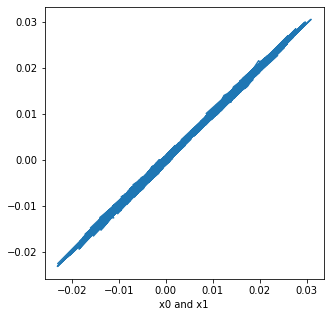

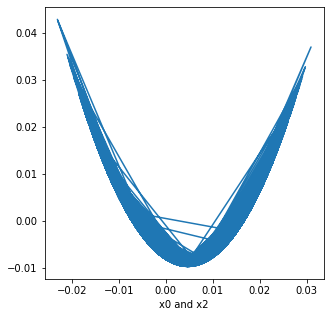

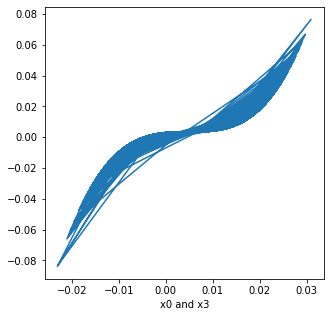

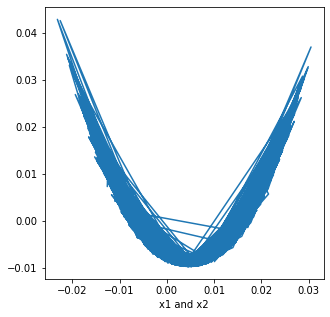

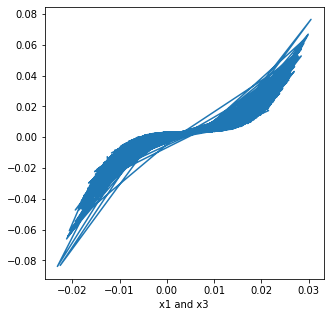

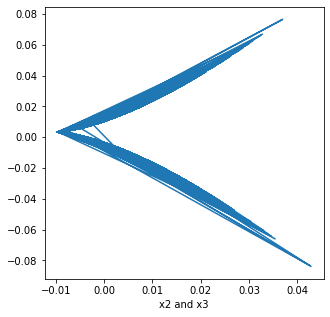

In [7]:
for i in range(0,len(Xtr[0])):
    for j in range(i+1,len(Xtr[0])):
        plt.figure(figsize=(5,5))
        x1 = Xtr.T[i]
        x2 = Xtr.T[j]
        plt.plot(x1,x2)
        plt.xlabel(f'x{i} and x{j}')

По приведенным соотношениям видно, что с чем коррелирует, но это мы чуть позже докажем с помощью критерия.

In [8]:
class Differentiable:
    def __init__(self):
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
        
    def backward(self, **kwargs):
        raise NotImplementedError()

В этом классе реализована функция потерь и поиск одного множителя градиента

В методе forward вычисляется $lossValue = L(y, \hat{y}) = \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2$, как и было заявлено в начале. Вместо суммирования - скалярное произведение векторов, компоненты которых и есть $(y_i - \hat{y}_i)$

В методе backward вычисляется $partialGrad =  \frac{1}{N} \cdot (-2)\cdot \sum\limits_{i=1}^n (y_i - \hat{y}_i)$, т.е. множитель градиента, который будет использоваться в методе градиентного спуска

In [9]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()

    def forward(self, y_pred, y_true):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        loss_value = 0.0

        ### YOUR CODE HERE
        N = len(y_true)
        
        loss_value = 1/N*np.dot((y_pred - y_true).T, (y_pred - y_true))
        
        loss_value = loss_value[0]
        
        return loss_value

    def backward(self, y_pred, y_true):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred

        partial_grad = np.zeros_like(y_pred - y_true)

        ### YOUR CODE HERE
        # partial_grad = ...
        N = len(y_true)
        
        partial_grad = 1/N * 2 * (y_pred - y_true)

        return partial_grad

В этом классе реализована модель линейной регрессии.

Здесь содержится главный атрибут - вектор параметров. Здесь содержится метод для поиска второго множителя градиента, используемого в МГС. И собственно функция, в которой реализован сам метод.

Для удобной работы в матрицу признаков добавлен едининый столбец. 'self.theta = self.theta[:, np.newaxis]' записано, чтобы было согласовано матричное произведение. y_pred = $\hat{y} = X \Theta$

In [10]:
class linear_regression(Differentiable):
    def __init__(self):
        super(linear_regression, self).__init__()
        self.theta = None

    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)

    def backward(self, X):
        # Этот метод реализует вычисление компоненты градиента функции потерь

        partial_grad = 0.0

        ### YOUR CODE HERE
        # partial_grad = ...
        X = np.array([np.append(1, X[i]) for i in range(len(X))])
        partial_grad = X.T

        return partial_grad

    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"

        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = 0.0

            ### YOUR CODE HERE
            # self.theta = ...
            cnt = len(X[0]) + 1
            self.theta = np.array([0]*cnt)
            self.theta = self.theta[:, np.newaxis]

        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        X = np.array([np.append(1, X[i]) for i in range(len(X))])

        # print(X.shape)
        # print(self.theta.shape)
        # assert 1==2

        y_pred = 0.0

        ### YOUR CODE HERE
        # y_pred = ...
        y_pred = np.dot(X, self.theta)

        return y_pred

Итак, в этом функции реализован МГС. Градиент grad = $gradL = X^T \cdot 2 \cdot (X \Theta - Y)$. 

Основная формула МГС была приведена выше ($\bf{w}_{n+1}= \bf{w}_n - \bf{\lambda} \cdot grad(L)$). Здесь она реализована как model.theta = 0.9*model.theta - lmd.T * grad.

При этом шаг итерации уменьшается с увеличением кол-ва итераций. Оно и понятно, колебания должны затухать в потенциальной яме. Шаг итерации подбирался вручную, начиная с 0.1 и уменьшая его в 10 раз. Множитель 0.9 взят по для того, чтобы в случае очень медленного спада (угла наклона) скорость увеличивалась (не могу объяснить теоретически, почему так, но это совет опытного программиста)

In [11]:
def train_loop(X, y, model, loss_fn, epochs=100):
    loss_history = []
    pbar = tqdm(total=epochs)

    cnt = len(X[0]) + 1
    lmd = np.array([0.1] * cnt)
    lmd = lmd[np.newaxis, :]
    mn = 1000000  # maximum, чтобы lmd не занулялась

    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn

        y_pred = model(X)

        lmd = lmd / min(epoch + 1, mn)

        ### YOUR CODE HERE
        # loss_value = ...
        # grad = ...
        # model.theta = ...
        loss_value = loss_fn.forward(y_pred, y)  # y = y_true
        grad = np.dot(model.backward(X), loss_fn.backward(y_pred, y))

        # print(grad.shape)
        # print(lmd.T.shape)
        # assert 1==2

        model.theta = model.theta - lmd.T * grad

        loss_history.append(loss_value)
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value})
    pbar.close()
    return loss_history

Применим критерий $R^2$ для проверки, являются ли признаки скорелированными

In [12]:
###Проверить исходные данные на предмет скоррелированности
for i in range(0,4):
    for j in range(i+1,4):
        x = Xtr.T[i]
        y = Xtr.T[j]

        cor_mtx = np.corrcoef(x,y)
        cor_xy = cor_mtx[0,1]
        r_squared = cor_xy**2
        print(f'r^2 between x{i+1} and x{j+1} is equal to {r_squared}')

r^2 between x1 and x2 is equal to 0.9983663985261114
r^2 between x1 and x3 is equal to 0.02495190228520124
r^2 between x1 and x4 is equal to 0.7590596140907812
r^2 between x2 and x3 is equal to 0.02475931330112765
r^2 between x2 and x4 is equal to 0.7573314710734638
r^2 between x3 and x4 is equal to 0.08467126749767344


Отчетливо видно, что $x_1$ и $x_2$ являются сильно скореллированными, так что признак $x_1$ можно удалить.
Также видно, что $x_2$ и $x_4$ скореллированы, но уже не так явно.

Отбросить признак могу, но довести до конца замысел - нет.

#Выбросим 1-ый столбец из матрицы Xtr
ln = len(Xtr[0])
Ln = len(Xtr)

Xtr = np.array([[Xtr[i][j] for j in range(1,ln)] for i in range(Ln)])

Проверяем дисперсию

In [13]:
#Чекнем дисперсию
for i in range(len(Xtr[0])):
    x = Xtr.T[i]
    sigma = np.dot(x,x.T)
    print(f'Дисперсия {i+1}-ого признака = {sigma}')

Дисперсия 1-ого признака = 0.8438939105908805
Дисперсия 2-ого признака = 0.8440187106717746
Дисперсия 3-ого признака = 0.34229638730590184
Дисперсия 4-ого признака = 0.9162367415110785


То же

#Выбросим 1-ый столбец из матрицы Xtr

ln = len(Xtr[0])
Ln = len(Xtr)
Xtr = np.array([[Xtr[i][j] for j in range(0,ln+1,2)] for i in range(Ln)])

print(len(Xtr[0]))

Осталось бы два существенных признака

Мне кажется, что здесь было бы корректно проверить, одинаково ли они распределены, но не вышло...

In [14]:
obj_fn = loss()
lr_model = linear_regression()
loss_history = train_loop(Xtr, ytr, lr_model, obj_fn, epochs=50)
k0 = loss_history[-1]

100%|██████████| 50/50 [00:04<00:00, 12.39it/s, loss=[294.84078985]]


График эволюции функции ошибки

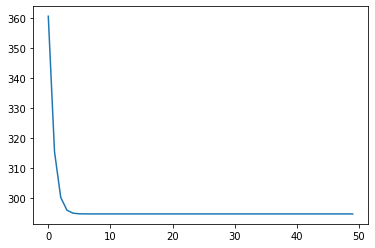

In [15]:
plt.plot(loss_history)

Проверка заключается в подстановке оставшейся части $X_{tr}$ в функцию ошибок. При этом т.к параметры уже найдены, то и $\hat{y}$ находится элементарно $\hat{y} = X_{tr} \Theta$

In [16]:
###Проверка на валидационной выборке

SREZ_ST = 7000
SREZ_FIN = 10000

Xtr = np.array(x_save[SREZ_ST:SREZ_FIN])

ytr = np.array(y_save[SREZ_ST:SREZ_FIN])


y_pred = lr_model.forward(Xtr)

k1 = obj_fn.forward(y_pred,ytr)
print(k1)

[320.21892952]


Данные брал 70% на 30%. От выбора многое зависит. Если обучать в левом диапазоне (от 0 до 7000), то функция ошибок больше на тестовой выборке. Такое соотношение сохраняется при движении влево. И  если обучать в правой части (3000-10000), то  функция ошибок на тестовой выборке немного меньше. Поэтому напрашивается вывод, что для описания данных модель подходит.

Однако опять-таки, я не учел распределение признаков.

На имеющихся данных наблюдалось недообучение в левом диапазоне и переобучение в правом.

Оценка качества проводилась по функции потерь Loss.

In [17]:
print(f'Оценка качества = {k0/k1}')

Оценка качества = [0.92074753]


0-7000 к 7000-10000 -> k = 0.92

7000-10000 к 0-3000 -> k = 1.34